In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
cols=['SHDR_IDL','PROD_IDL','PRTYPE_IDL','RPRICE','QUANTITY','DATEORDER']
dtl=pd.read_csv("E:/3rd Semester/SalesDTL.csv",usecols=cols,parse_dates=['DATEORDER'],
                dtype={'SHDR_IDL':int,'PROD_IDL':int,'PRTYPE_IDL':int,'QUANTITY':int})

#converting column names to lower case
dtl.columns=dtl.columns.str.lower()

dtl=dtl.set_index("dateorder")
dtl['rprice']=dtl['rprice'].abs()
dtl['total_price']=dtl['rprice']*dtl['quantity']
dtl=dtl.loc['2016-03-06':,]
dtl['prod_idl']=dtl['prod_idl'].astype('category')
dtl.head()

,shdr_idl,prod_idl,prtype_idl,rprice,quantity,total_price
dateorder,,,,,,
2016-03-06 14:33:35,31424,51,13,3.5,1,3.5
2016-03-06 14:35:41,31425,163,26,39.8,4,159.2
2016-03-06 14:35:41,31425,81,26,8.5,1,8.5
2016-03-06 14:36:35,31426,163,26,19.9,2,39.8
2016-03-06 14:37:43,31427,428,26,19.9,2,39.8


In [104]:
top_items=dtl.groupby('prod_idl').size().reset_index(name='Count').nlargest(20,'Count')
top_items

,prod_idl,Count
2,31,30403
95,163,27432
17,65,19478
114,242,17114
58,110,13790
113,239,12136
3,42,11725
9,56,10647
102,178,10472
32,81,10289


In [106]:
top_item_types=dtl.groupby('prtype_idl').size().reset_index(name='Count').nlargest(20,'Count')
top_item_types

,prtype_idl,Count
5,18,117818
2,13,79969
0,8,72739
1,10,72659
11,26,64680
12,27,22635
8,23,12811
3,14,9910
6,19,3253
7,21,441


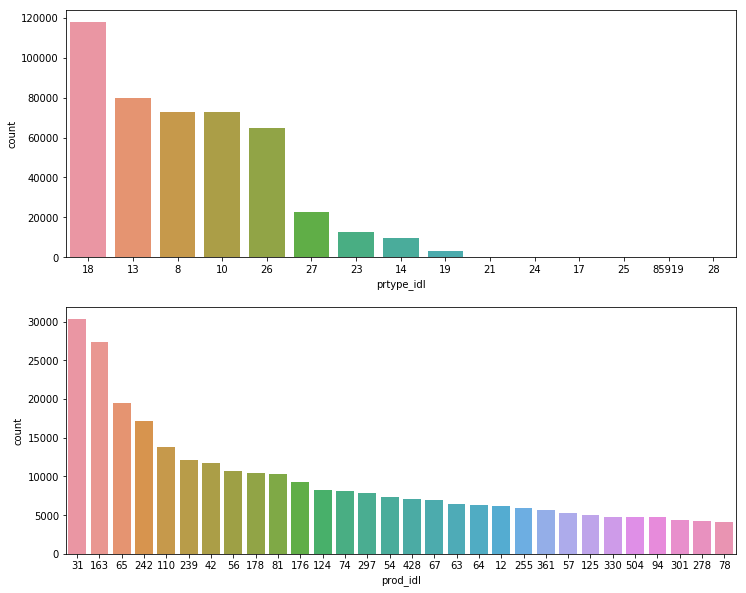

In [103]:
f, axes = plt.subplots(2, 1,figsize=(12,10))
sns.countplot(dtl['prtype_idl'],order=dtl.prtype_idl.value_counts().index,ax=axes[0])
sns.countplot(x="prod_idl", data=dtl,order=dtl.prod_idl.value_counts().iloc[:30].index,ax=axes[1])

In [14]:
dtl_resampled=dtl.resample('D',how='sum')[['quantity','total_price']]
dtl_resampled.head()

C:\Users\umarsheaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


,quantity,total_price
dateorder,,
2016-03-06,923,9566.61
2016-03-07,699,5212.72
2016-03-08,608,4879.61
2016-03-09,470,3282.25
2016-03-10,517,3725.68


Text(0.5, 1.0, 'total_price')

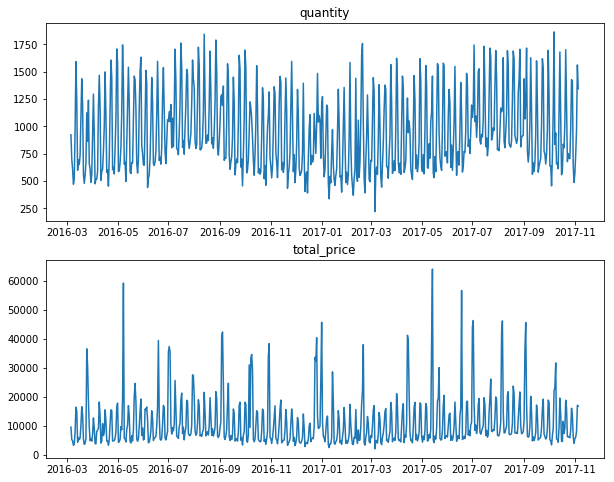

In [31]:
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,8))
ax1.plot(dtl_resampled['quantity'])
ax1.set_title('quantity')
ax2.plot(dtl_resampled['total_price'])
ax2.set_title('total_price')

In [107]:
#sliced data of a year

In [133]:
sliced_year=dtl_resampled.loc['2016-04-01':'2017-03-31',]

In [134]:
sliced_year.shape

(365, 2)

In [135]:
sliced_year=sliced_year.reset_index()

In [136]:
sliced_year.dateorder.dt.month

0      4
1      4
2      4
3      4
4      4
5      4
6      4
7      4
8      4
9      4
10     4
11     4
12     4
13     4
14     4
15     4
16     4
17     4
18     4
19     4
20     4
21     4
22     4
23     4
24     4
25     4
26     4
27     4
28     4
29     4
      ..
335    3
336    3
337    3
338    3
339    3
340    3
341    3
342    3
343    3
344    3
345    3
346    3
347    3
348    3
349    3
350    3
351    3
352    3
353    3
354    3
355    3
356    3
357    3
358    3
359    3
360    3
361    3
362    3
363    3
364    3
Name: dateorder, Length: 365, dtype: int64

In [137]:
grouped_month=sliced_year.groupby(sliced_year.dateorder.dt.month).sum()
grouped_month

,quantity,total_price
dateorder,,
1,23667,290261.48
2,22825,254171.25
3,26482,257727.63
4,27086,259193.97
5,30508,361574.25
6,27973,309548.21
7,34488,444119.69
8,33988,333609.36
9,29046,349786.14


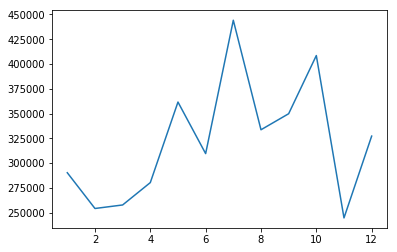

In [128]:
plt.plot(grouped_month['total_price'])

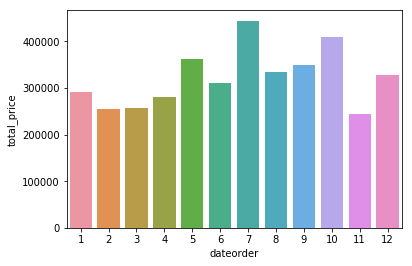

In [131]:
sns.barplot(x=grouped_month.index,y=grouped_month['total_price'])

In [142]:
validate_year=dtl_resampled.loc['2017-04-01':'2017-10-31',]

In [145]:
validate_year=validate_year.reset_index()

In [146]:
grouped_validity=validate_year.groupby(validate_year.dateorder.dt.month).sum()
grouped_validity

,quantity,total_price
dateorder,,
4,28297,362598.85
5,28638,378577.72
6,28085,326754.36
7,35684,439416.69
8,34003,410117.05
9,30053,355281.17
10,28866,327522.28


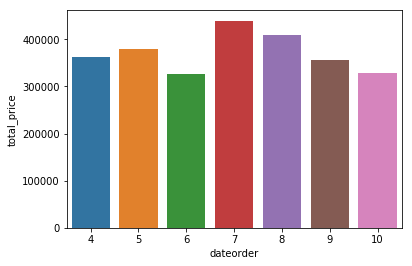

In [147]:
sns.barplot(x=grouped_validity.index,y=grouped_validity['total_price'])

In [150]:
#resampling with month
dtl_resampled_month=dtl.resample('M',how='sum')[['quantity','total_price']]

C:\Users\umarsheaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


In [157]:
dtl_resample_month=dtl_resampled_month[:'2017-10-31']
dtl_resample_month

,quantity,total_price
dateorder,,
2016-03-31,21187.0,257632.35
2016-04-30,27086.0,259469.09
2016-05-31,30508.0,361751.65
2016-06-30,27973.0,309703.11
2016-07-31,34488.0,444257.99
2016-08-31,33988.0,333946.54
2016-09-30,29046.0,349786.14
2016-10-31,28494.0,408523.13
2016-11-30,26442.0,244756.16


Text(0.5, 1.0, 'total_price')

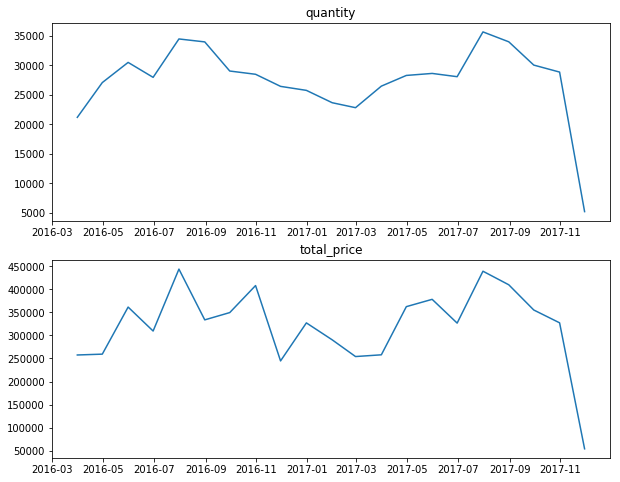

In [158]:
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,8))
ax1.plot(dtl_resampled_month['quantity'])
ax1.set_title('quantity')
ax2.plot(dtl_resampled_month['total_price'])
ax2.set_title('total_price')

[Text(0, 0, '2016-03-31T00:00:00.000000000'),
 Text(0, 0, '2016-04-30T00:00:00.000000000'),
 Text(0, 0, '2016-05-31T00:00:00.000000000'),
 Text(0, 0, '2016-06-30T00:00:00.000000000'),
 Text(0, 0, '2016-07-31T00:00:00.000000000'),
 Text(0, 0, '2016-08-31T00:00:00.000000000'),
 Text(0, 0, '2016-09-30T00:00:00.000000000'),
 Text(0, 0, '2016-10-31T00:00:00.000000000'),
 Text(0, 0, '2016-11-30T00:00:00.000000000'),
 Text(0, 0, '2016-12-31T00:00:00.000000000'),
 Text(0, 0, '2017-01-31T00:00:00.000000000'),
 Text(0, 0, '2017-02-28T00:00:00.000000000'),
 Text(0, 0, '2017-03-31T00:00:00.000000000'),
 Text(0, 0, '2017-04-30T00:00:00.000000000'),
 Text(0, 0, '2017-05-31T00:00:00.000000000'),
 Text(0, 0, '2017-06-30T00:00:00.000000000'),
 Text(0, 0, '2017-07-31T00:00:00.000000000'),
 Text(0, 0, '2017-08-31T00:00:00.000000000'),
 Text(0, 0, '2017-09-30T00:00:00.000000000'),
 Text(0, 0, '2017-10-31T00:00:00.000000000'),
 Text(0, 0, '2017-11-30T00:00:00.000000000')]

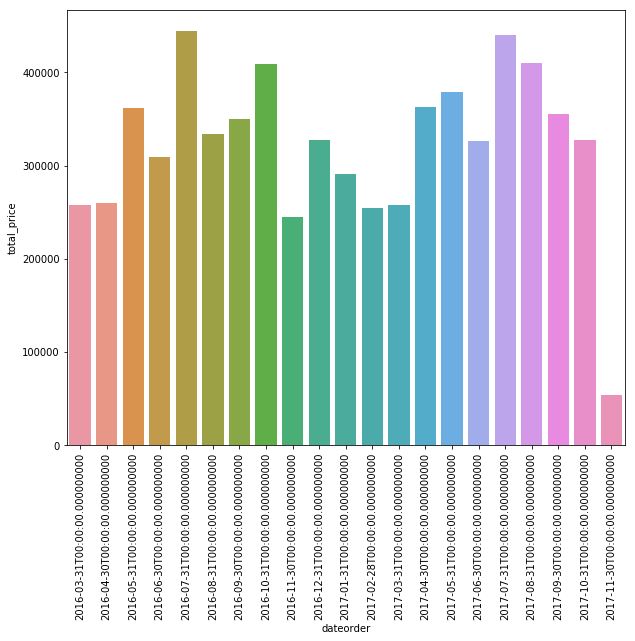

In [171]:
f=plt.figure(figsize=(10,8))
g=sns.barplot(x=dtl_resampled_month.index,y=dtl_resampled_month['total_price'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)